In [1]:
# TODO: Feature Lifting for the 5 Numerical Features #
# TODO: Feature Selection #
# TODO: Better Hyperparameter Tuning of KNN. Cross Validation, no testing on testing data -> supposed to be unseen data, can't choose K based on that. #

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline # will be utilized to handle scaling of data AFTER it has been split into train/test by cross-validation
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [2]:
# Load flagged dataset #
dataset_flagged = pd.read_csv("filtered.csv")
X = dataset_flagged.drop(['cls'], axis=1)
Y = dataset_flagged['cls']

We will be using cross-validation. 

In [ ]:
summary_flagged_un = X.agg(['min', 'max']).T # agg applies both the min and max function, T transposes it
summary_flagged_un.columns = ['Min Value', 'Max Value'] # rename columns

display(summary_flagged_un)

,Min Value,Max Value
Unnamed: 0,0.000000,18757.0
duration,2.000000,601404954.0
pps,0.019762,1000000.0
bps,3.557943,617000000.0
max_flowiat,2.000000,600109654.0
mean_flowiat,2.000000,60700000.0
has_active,0.000000,1.0
has_std_active,0.000000,1.0
has_fiat,0.000000,1.0
has_biat,0.000000,1.0


Looking above, we notice that we have big numbers. It'd be easier to run calculations with smaller values. We will use the StandardScaler to normalize everything before training any of the models.

For both of these models, we will first do hyperparameter tuning. 

KNN requires that we tune only the number of neighbors. We will fit multiple values for the neighbor parameter and choose the one with the highest test scores.

In [10]:
# Split dataset #
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1, stratify=Y)

n_neighbors = range(1, 30, 2)
mean_accuracies = {}
best_score = 0
neighbor = 0

for k in n_neighbors:
    pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k))
    score = cross_val_score(pipeline, x_train, y_train, cv=10).mean()
    mean_accuracies[k] = score

    if best_score < score:
        best_score = score
        neighbor = k

final_test = KNeighborsClassifier(n_neighbors=neighbor)
score = cross_val_score(final_test, x_test, y_test, cv=10).mean()

score

np.float64(0.6702970297029702)

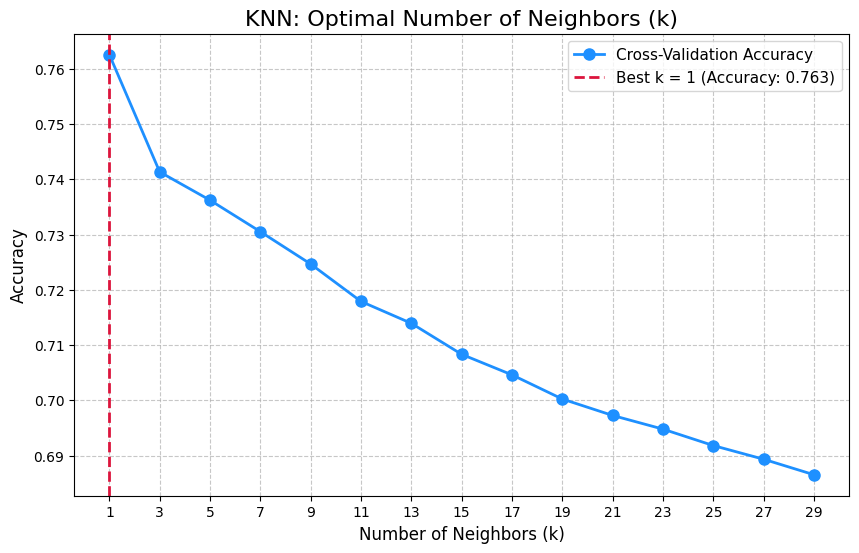

In [12]:

# --- The Enhanced Plot ---

# Set a good figure size for better visibility
plt.figure(figsize=(10, 6))

# Plot the accuracy scores with markers and a thicker line
plt.plot(n_neighbors, mean_accuracies.values(), 
         color='dodgerblue', 
         marker='o',          # Add markers to show each point
         linewidth=2,         # Make the line thicker
         markersize=8,        # Make the markers bigger
         label='Cross-Validation Accuracy')

# Highlight the best score with a vertical line
plt.axvline(x=neighbor, color='crimson', linestyle='--', linewidth=2,
            label=f'Best k = {neighbor} (Accuracy: {best_score:.3f})')

# Add titles and labels with improved font sizes
plt.title('KNN: Optimal Number of Neighbors (k)', fontsize=16)
plt.xlabel("Number of Neighbors (k)", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

# Set clearer x-axis ticks (showing every 2nd k)
plt.xticks(np.arange(min(n_neighbors), max(n_neighbors)+1, 2))

# Add a grid for easier value reading and a legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=11)

# Show the plot
plt.show()